# Notebook para evaluación del SRI Vectorial

## Configuración inicial

In [1]:
# Cranfield load
from engine.cranfield import CranfieldGetter as Getter
from engine.cranfield import dataset

In [2]:
# Model load
from engine.vector import VectorIRS as IRS

In [3]:
# Get id of all documents
all_docs=[d.doc_id for d in dataset.docs_iter()]

In [4]:
# Setup system
IRS = IRS()
IRS.data_getter=Getter()

In [5]:
# Index the documents
IRS.add_documents(all_docs)

In [6]:
# Import Qrels and metrics
import engine.metrics as m
from engine.cranfield import CranfieldQrelsGetter as QrelGetter

# Maximum relevance definition
class MaxRelMetric(m.IRSMetric):
    def calculate(self, irs, qrel) -> float:
        return max((r for _,r in irs.pre_query(qrel.query)))

METRICS = {
    'Time': m.TimeMetric(), # In seconds
    'Prec':m.PrecisionMetric(),
    'Rec':m.RecoveryMetric(),
    'F1':m.F1Metric(),
    'Max': MaxRelMetric()
}

In [7]:
# Qrels load
QRELS=QrelGetter().getqrels()

In [8]:
from typing import Iterable

# Result of each metric in the model
RESULTS={}

## Cálculo

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def print_results(metric):
    results = RESULTS[metric]

    ser = pd.Series(pd.cut(results, 15))
    grouped=ser.groupby(ser).count()

    df=pd.DataFrame(grouped.values,grouped.index)
    df.index.name='Intervalo'
    df.columns=['Frecuencia Absoluta']

    total=df['Frecuencia Absoluta'].sum()

    df['Frecuencia Relativa']=df['Frecuencia Absoluta']/total
    df['Porcentaje']=df['Frecuencia Relativa']*100
    df['Marca de Clase']=df.index.map(lambda x:x.mid)

    print(f'Promedio: {np.mean(results):.5f}')
    print(f'Máximo: {np.max(results):.5f}')
    print(f'Mínimo: {np.min(results):.5f}')
    print(f"Moda: {[float(x) for x in (df.loc[df['Frecuencia Absoluta'] == df.max()['Frecuencia Absoluta']]['Marca de Clase']).values]}")
    print(f"Mediana: {np.median(results):.5f}")
    print(f"Desviación estándar: {np.std(results):.5f}")
    
    print("\nCuartiles:")
    print(f"\tQ1:{np.quantile(results,.25)}")
    print(f"\tQ3:{np.quantile(results,.75)}")

    return df


def plot(metric):
    # Plotting
    plt.style.use('ggplot')
    plt.figure(figsize=(9, 5))
    plt.hist(RESULTS[metric], bins=15)

    return plt.show()


### Tiempo de procesado de la consulta en segundos

In [11]:
metric='Time'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)


In [12]:
print_results(metric)

Promedio: 0.23210
Máximo: 0.32690
Mínimo: 0.21100
Moda: [0.23]
Mediana: 0.23080
Desviación estándar: 0.01189

Cuartiles:
	Q1:0.224
	Q3:0.2378


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(0.211, 0.219]",17,0.075556,7.555556,0.2150
"(0.219, 0.226]",57,0.253333,25.333333,0.2225
"(0.226, 0.234]",67,0.297778,29.777778,0.2300
"(0.234, 0.242]",46,0.204444,20.444444,0.2380
"(0.242, 0.25]",26,0.115556,11.555556,0.2460
"(0.25, 0.257]",10,0.044444,4.444444,0.2535
"(0.257, 0.265]",0,0.000000,0.000000,0.2610
"(0.265, 0.273]",0,0.000000,0.000000,0.2690
"(0.273, 0.281]",1,0.004444,0.444444,0.2770


#### Histograma de frecuencia

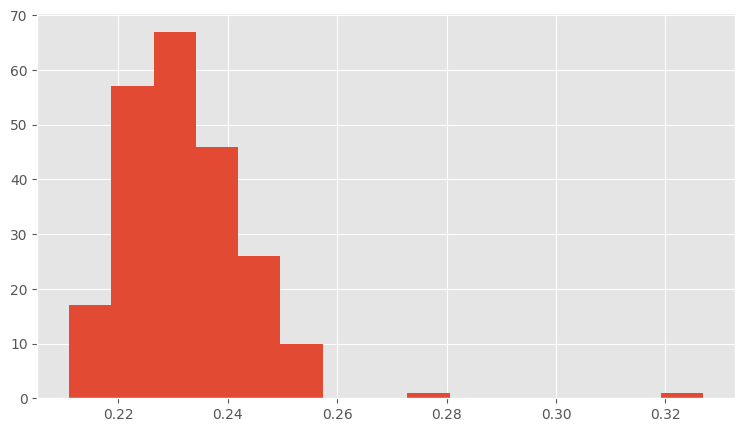

In [13]:
plot(metric)

### Precisión

In [14]:
metric='Prec'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)



In [15]:
print_results(metric)

Promedio: 0.20689
Máximo: 1.00000
Mínimo: 0.00000
Moda: [0.03285]
Mediana: 0.16000
Desviación estándar: 0.21414

Cuartiles:
	Q1:0.0
	Q3:0.3333333333333333


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(-0.001, 0.0667]",72,0.320000,32.000000,0.03285
"(0.0667, 0.133]",32,0.142222,14.222222,0.09985
"(0.133, 0.2]",24,0.106667,10.666667,0.16650
"(0.2, 0.267]",29,0.128889,12.888889,0.23350
"(0.267, 0.333]",22,0.097778,9.777778,0.30000
"(0.333, 0.4]",13,0.057778,5.777778,0.36650
"(0.4, 0.467]",5,0.022222,2.222222,0.43350
"(0.467, 0.533]",12,0.053333,5.333333,0.50000
"(0.533, 0.6]",2,0.008889,0.888889,0.56650


#### Histograma de frecuencia

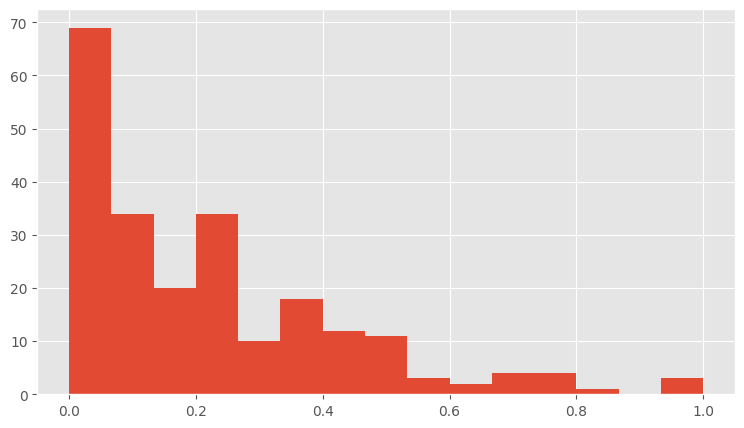

In [16]:
plot(metric)

### Recobrado

In [17]:
metric='Rec'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)


In [18]:
print_results(metric)

Promedio: 0.37496
Máximo: 1.00000
Mínimo: 0.00000
Moda: [0.03285]
Mediana: 0.28571
Desviación estándar: 0.34354

Cuartiles:
	Q1:0.05263157894736842
	Q3:0.6


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(-0.001, 0.0667]",58,0.257778,25.777778,0.03285
"(0.0667, 0.133]",12,0.053333,5.333333,0.09985
"(0.133, 0.2]",24,0.106667,10.666667,0.16650
"(0.2, 0.267]",15,0.066667,6.666667,0.23350
"(0.267, 0.333]",22,0.097778,9.777778,0.30000
"(0.333, 0.4]",8,0.035556,3.555556,0.36650
"(0.4, 0.467]",7,0.031111,3.111111,0.43350
"(0.467, 0.533]",14,0.062222,6.222222,0.50000
"(0.533, 0.6]",13,0.057778,5.777778,0.56650


#### Histograma de frecuencia

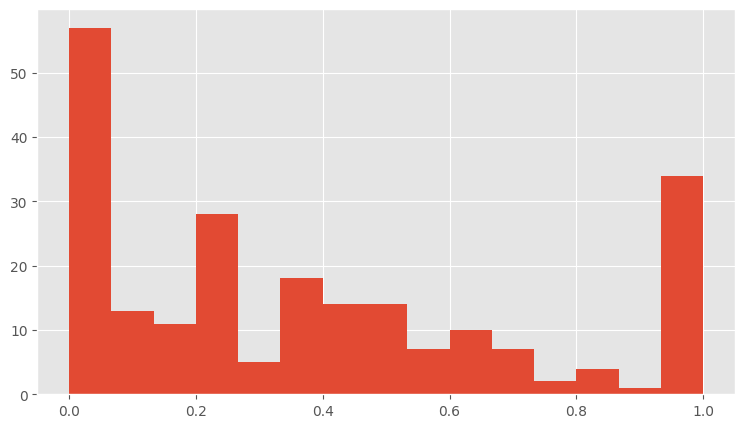

In [19]:
plot(metric)

### Fórmula F1

In [20]:
metric='F1'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)



In [21]:
print_results(metric)

Promedio: 0.20432
Máximo: 0.85714
Mínimo: 0.00000
Moda: [0.0281215]
Mediana: 0.18182
Desviación estándar: 0.18352

Cuartiles:
	Q1:0.0
	Q3:0.3333333333333333


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(-0.000857, 0.0571]",67,0.297778,29.777778,0.028122
"(0.0571, 0.114]",8,0.035556,3.555556,0.085550
"(0.114, 0.171]",36,0.160000,16.000000,0.142500
"(0.171, 0.229]",21,0.093333,9.333333,0.200000
"(0.229, 0.286]",20,0.088889,8.888889,0.257500
"(0.286, 0.343]",24,0.106667,10.666667,0.314500
"(0.343, 0.4]",22,0.097778,9.777778,0.371500
"(0.4, 0.457]",8,0.035556,3.555556,0.428500
"(0.457, 0.514]",6,0.026667,2.666667,0.485500


#### Histograma de frecuencia

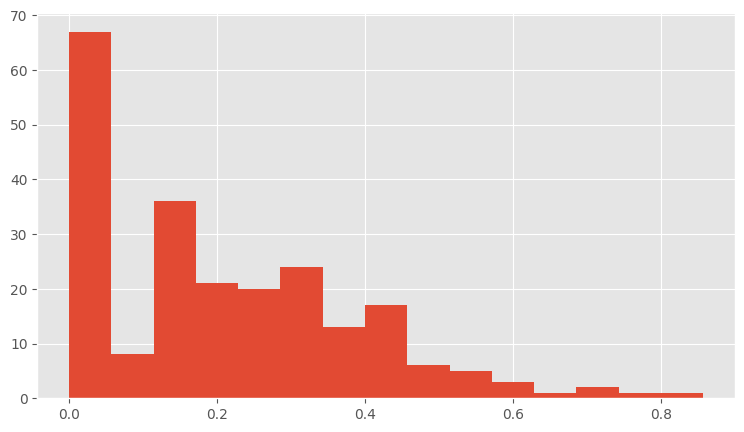

In [22]:
plot(metric)

### Relevancia máxima


In [23]:
metric='Max'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)



In [24]:
print_results(metric)

Promedio: 0.33295
Máximo: 0.68659
Mínimo: 0.11020
Moda: [0.3215]
Mediana: 0.31730
Desviación estándar: 0.10872

Cuartiles:
	Q1:0.24865747934784596
	Q3:0.39074956704593505


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(0.11, 0.149]",2,0.008889,0.888889,0.1295
"(0.149, 0.187]",10,0.044444,4.444444,0.1680
"(0.187, 0.225]",22,0.097778,9.777778,0.2060
"(0.225, 0.264]",33,0.146667,14.666667,0.2445
"(0.264, 0.302]",32,0.142222,14.222222,0.2830
"(0.302, 0.341]",36,0.160000,16.000000,0.3215
"(0.341, 0.379]",26,0.115556,11.555556,0.3600
"(0.379, 0.418]",18,0.080000,8.000000,0.3985
"(0.418, 0.456]",15,0.066667,6.666667,0.4370


#### Histograma de frecuencia

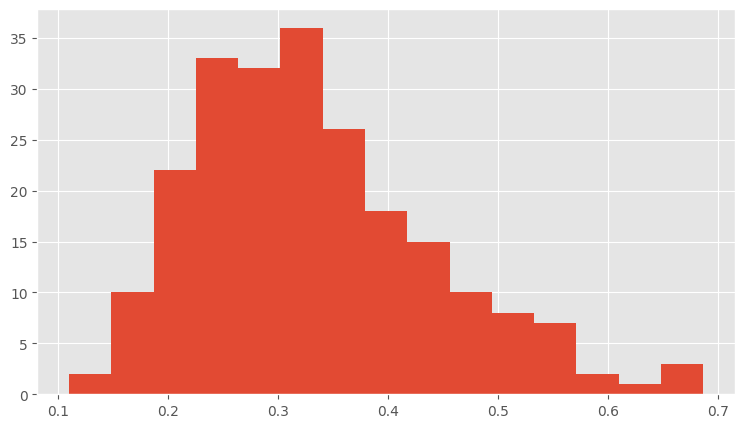

In [25]:
plot(metric)